In [1]:

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', None)

In [2]:
# Let's get some data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
train.OverallQual.value_counts()


OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [5]:
train.shape

(1460, 81)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
import plotly.express as px  #If plotly not installed - uncomment the previous cell and execute

In [10]:
px.scatter(train, x="OverallQual", y='SalePrice')

In [11]:
px.scatter(train, y='SalePrice',x='GarageArea',trendline='ols')

In [12]:
px.scatter(train, y='SalePrice',x='LotArea',trendline='ols')

C:\Users\User\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



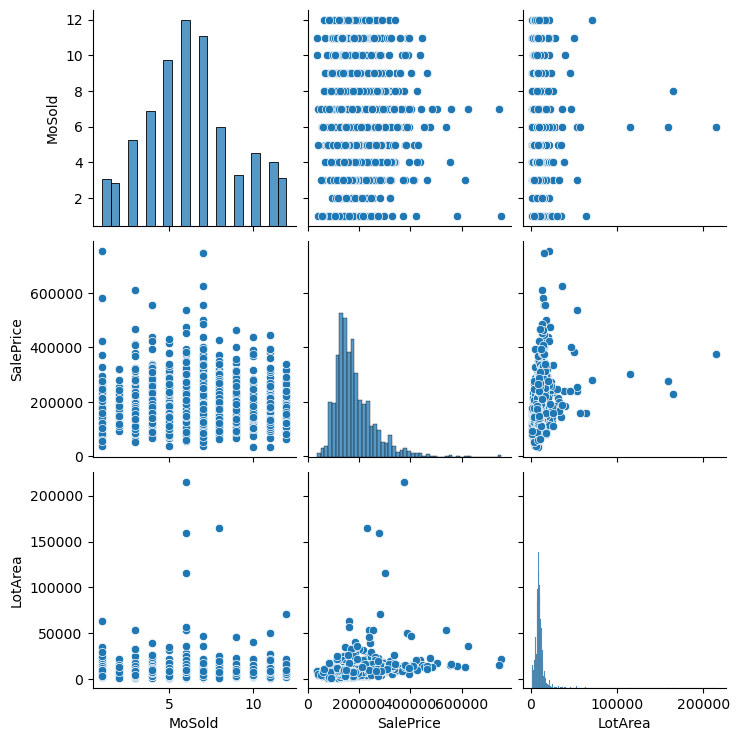

In [13]:
import seaborn as sns

sns.pairplot(train[['MoSold', 'SaleCondition', 'SalePrice', 'LotArea']]);

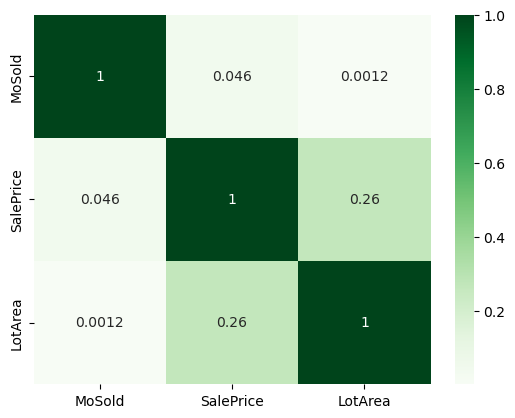

In [14]:
cols = ['MoSold', 'SaleCondition', 'SalePrice', 'LotArea']
sns.heatmap(train[cols].corr(numeric_only=True), annot=True,cmap='Greens');

In [15]:
corr_SP = train.corr(numeric_only=True)["SalePrice"]

In [16]:
corr_SP.sort_values(ascending=False) #getting the sorted Correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [17]:
train[cols].dtypes

MoSold            int64
SaleCondition    object
SalePrice         int64
LotArea           int64
dtype: object

In [18]:
mod = smf.ols('SalePrice~GarageArea', train)

In [19]:
res = mod.fit()

In [20]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          5.27e-158
Time:                        16:36:01   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.0

In [21]:
train.OverallQual.dtypes

dtype('int64')

In [22]:
mod = smf.ols('SalePrice~OverallQual', train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          2.19e-313
Time:                        16:36:26   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

In [23]:
train[train.OverallQual == 2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
636    637          30       RM         51.0     6120   Pave   NaN      Reg   
916    917          20  C (all)         50.0     9000   Pave   NaN      Reg   
1100  1101          30       RL         60.0     8400   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
636          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
916          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1100         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
636       1   2009     ConLw         Normal      60000  
916      10   2006        WD        Abnorml      35311  
1100      1   2009        WD         Normal      60000  

[3 rows x 81 columns]

In [24]:
train.OverallQual = train.OverallQual.astype("category")

In [25]:
train.OverallQual.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

In [26]:
mod = smf.ols('SalePrice~OverallQual', train) #+GarageArea+LotArea+LotFrontage+Condition1
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:                -17703.
No. Observations:                1460   AIC:                         3.543e+04
Df Residuals:                    1450   BIC:                         3.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.015e+04   3.17e+0

In [27]:
test.OverallQual.isna().sum()

0

In [28]:
test["GarageArea"] = test["GarageArea"].fillna(0)

In [29]:
test.OverallQual = test.OverallQual.astype("category")

y_hat = res.predict(test[["OverallQual", "GarageArea", "LotArea", "LotFrontage", "Condition1"]]) #+GarageArea+LotArea+LotFrontage+Condition1

In [30]:
pd.get_dummies(test.OverallQual).head()

1      2      3      4      5      6      7      8      9     10
0  False  False  False  False   True  False  False  False  False  False
1  False  False  False  False  False   True  False  False  False  False
2  False  False  False  False   True  False  False  False  False  False
3  False  False  False  False  False   True  False  False  False  False
4  False  False  False  False  False  False  False   True  False  False

In [31]:
px.scatter(train, y='SalePrice',x='GarageArea',trendline='ols')

In [32]:
px.scatter(train, y='SalePrice',x='LotArea',trendline='ols')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

In [34]:
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [35]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

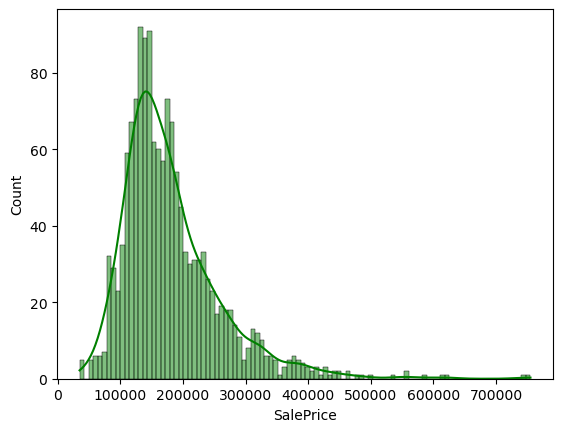

In [36]:
sns.histplot(train["SalePrice"],color='g',bins=100,kde=True)

In [37]:
list(set(train.dtypes.tolist()))

[dtype('float64'),
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False),
 dtype('int64'),
 dtype('O')]

In [38]:
train_num=train.select_dtypes(include=['float64','int64'])

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>

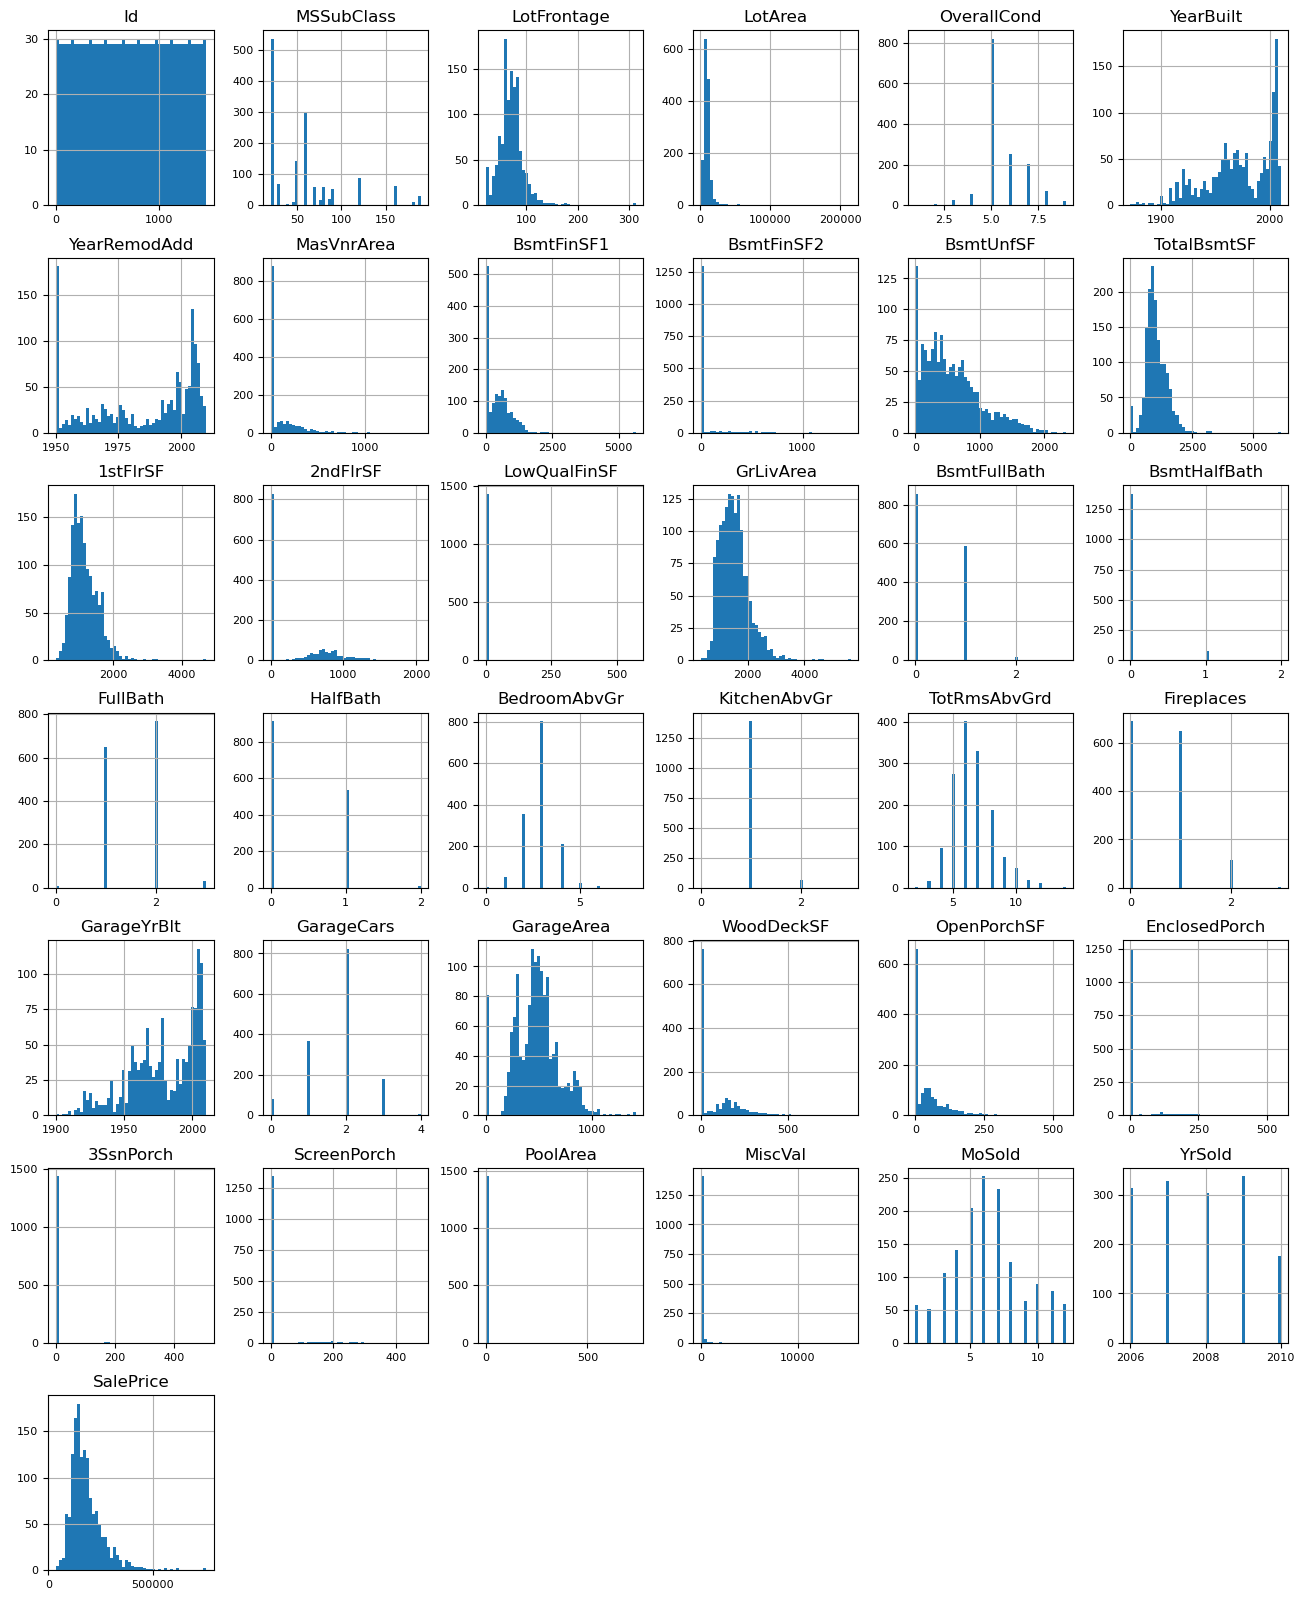

In [39]:
train_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

In [40]:
def split_dataset(dataset,test_ratio=0.30):
    test_indices=np.random.rand(len(dataset))<test_ratio # this will be bollean
    return dataset[~test_indices],dataset[test_indices]

new_train,valid_train=split_dataset(train)
print(len(new_train),len(valid_train))


1036 424


In [41]:
new_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
52      53          90       RM        110.0     8472   Grvl   NaN      IR2   
54      55          80       RL         60.0     7134   Pave   NaN      Reg   
56      57         160       FV         24.0     2645   Pave  Pave      Reg   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
62      63         120       RL         44.0     6442   Pave   NaN      IR1   
65      66          60       RL         76.0     9591   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
67      68          20       RL         72.0    10665   Pave   NaN      IR1   
68      69          30       RM         47.0     4608   Pave   NaN      Reg   
69      70          50       RL         81.0    15593   Pa

In [45]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  
0       0      6   2010        WD         Normal  
1   12500      6   2010        WD         Normal  
2       0      3   2010        WD         Normal  
3       0      6   2010        WD         Normal  
4       0      1   2010        WD         Normal  

[5 rows x 80 columns]

In [46]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [47]:
def columns_missing(df, normalize=False):
    
    missing_value_counts = df.isnull().sum()

    # Filter out columns with no missing values
    columns_with_missing_values = missing_value_counts[missing_value_counts > 0]

    if normalize:
        # Calculate percentage missing per column
        percentage_missing = (columns_with_missing_values / len(df)) * 100
        return percentage_missing
    
    return columns_with_missing_values
    

In [48]:
missing_vals = columns_missing(train, normalize=True)

In [49]:
vals_to_remove = missing_vals[missing_vals > 10].index.to_list()
vals_to_remove

['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [50]:
train.drop(vals_to_remove, axis=1, inplace=True)

In [51]:
train.duplicated(keep='first').sum()

0

In [52]:
def sep_column_types(dataframe):
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    categorical_columns = dataframe.select_dtypes(include=[object, 'category'])
    return numeric_columns, categorical_columns


numeric_columns, categorical_columns = sep_column_types(X)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1314, 80) (146, 80) (1314,) (146,)


In [59]:
import matplotlib.pyplot as plt

In [60]:
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [63]:
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

In [64]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

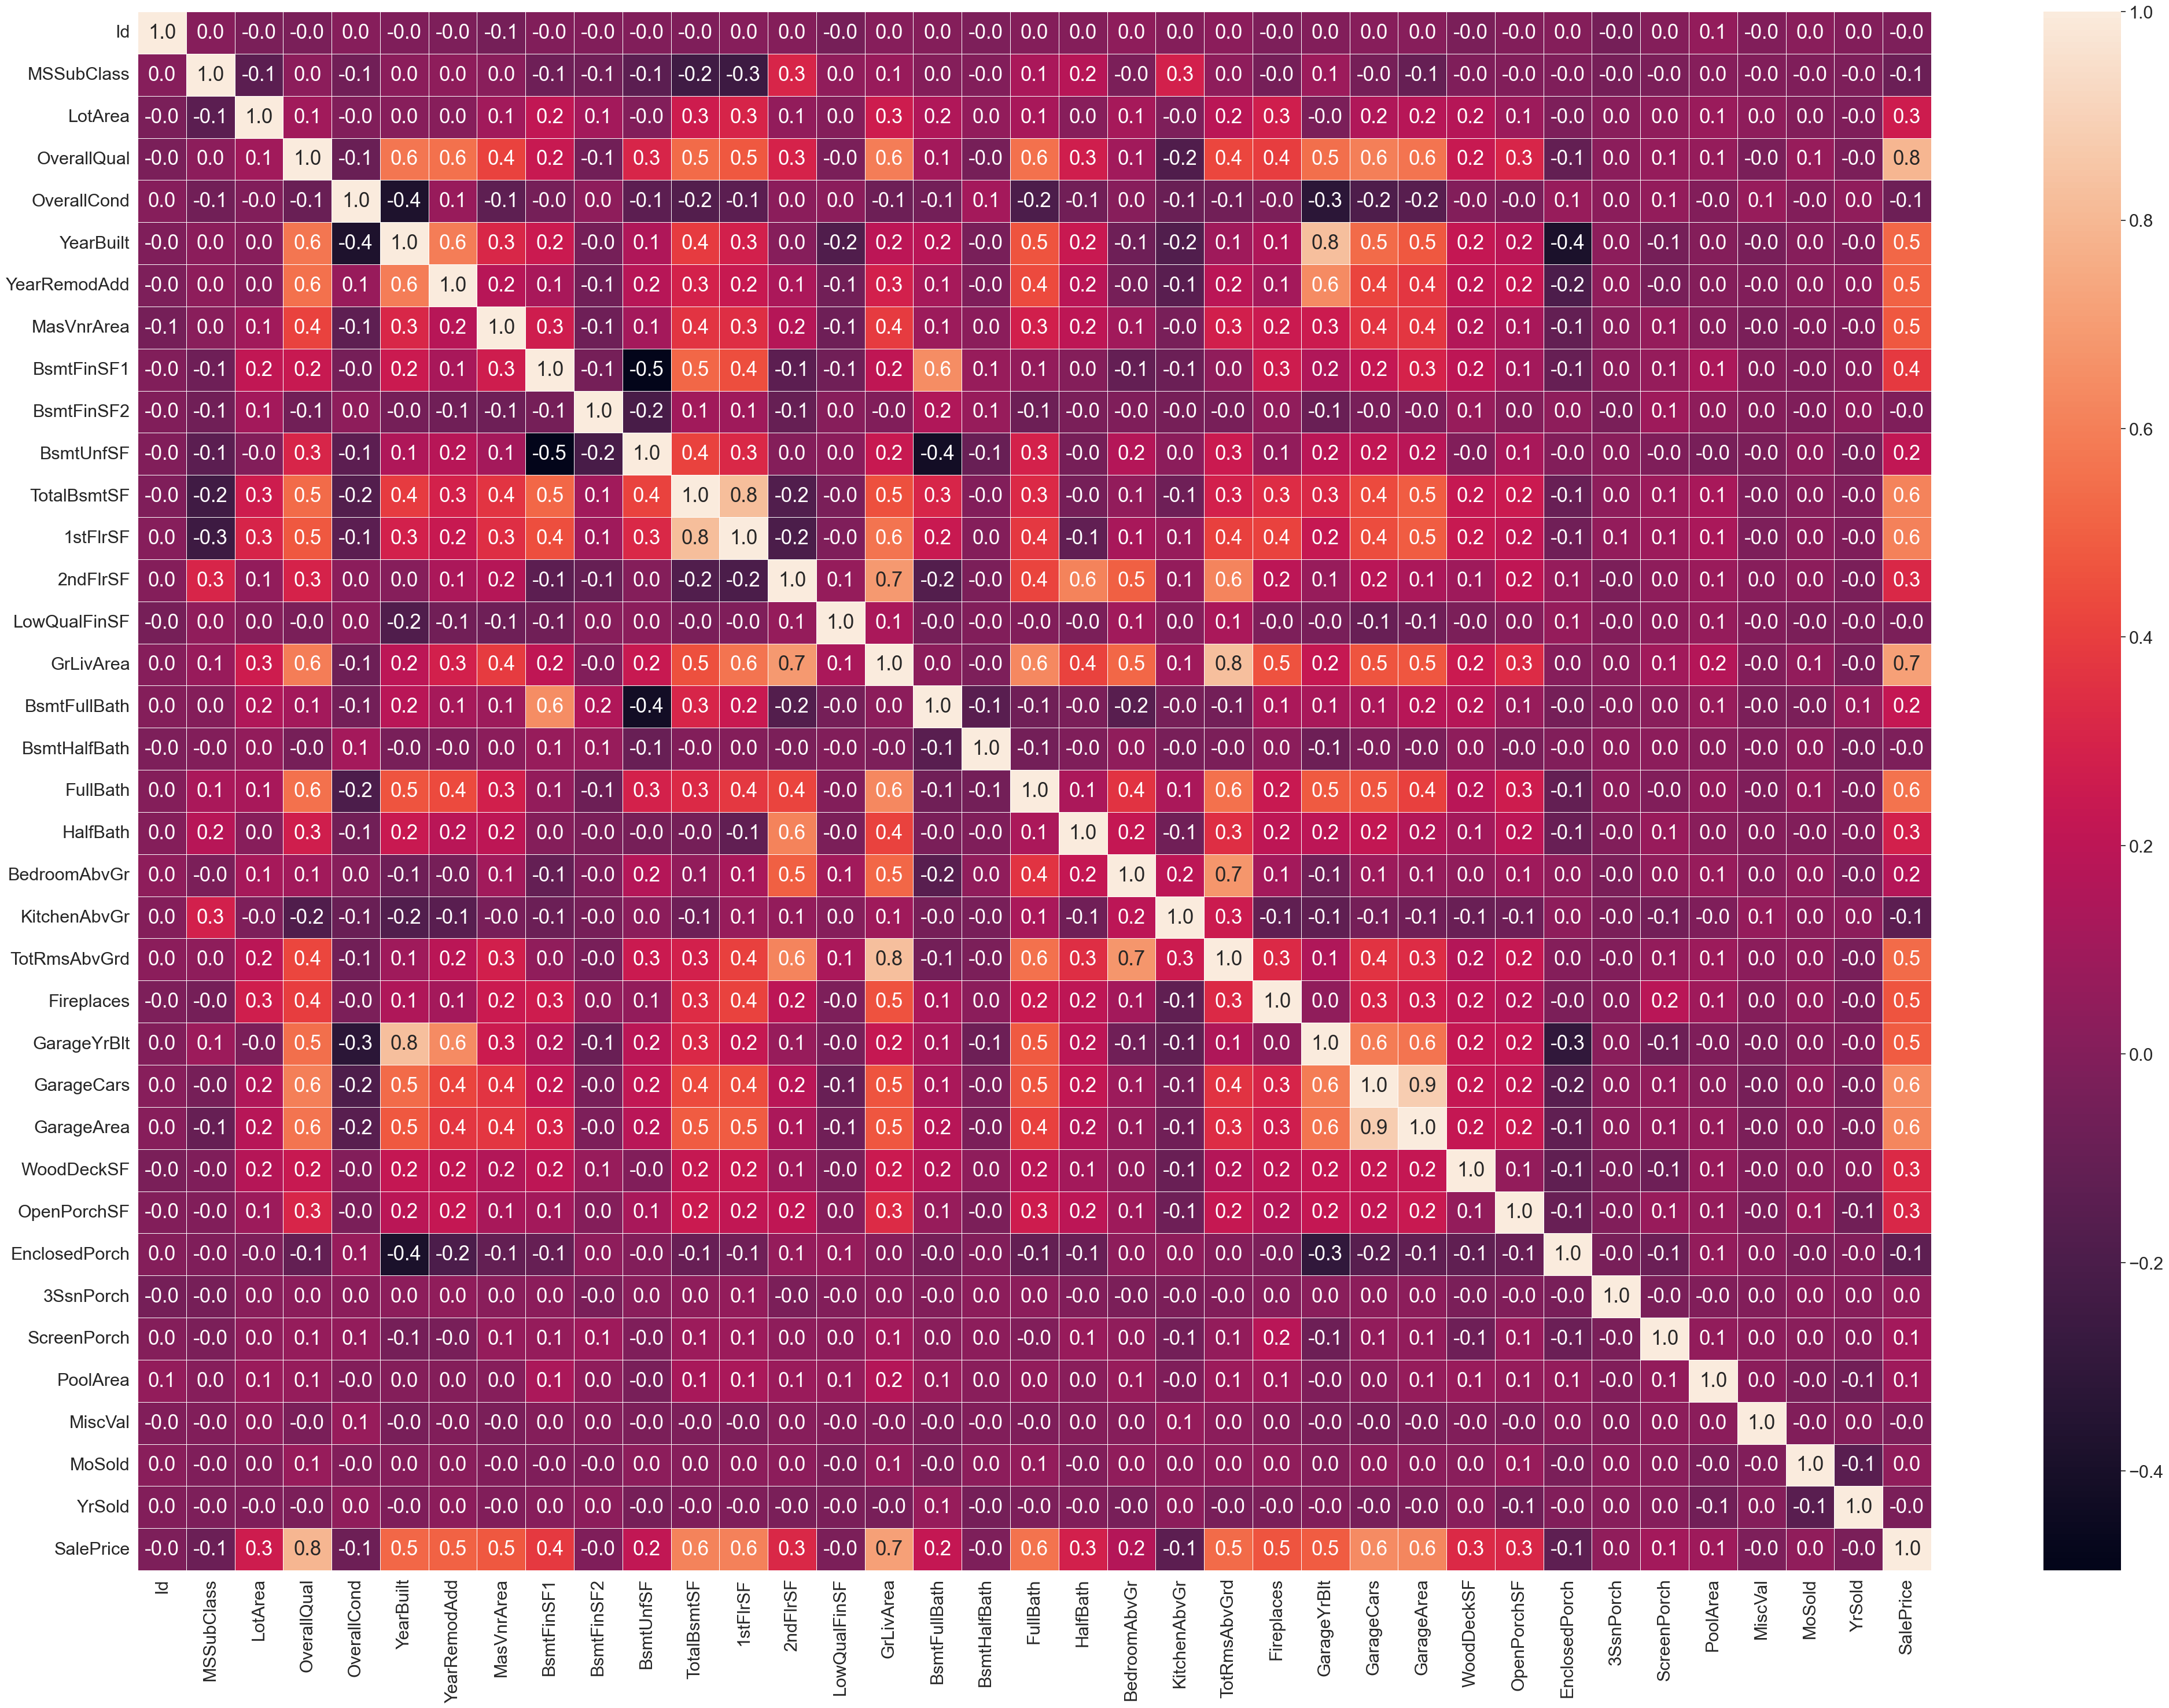

In [66]:
correlation_train=train[train.dtypes[train.dtypes != 'object'].index].corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f', linewidths=.5)

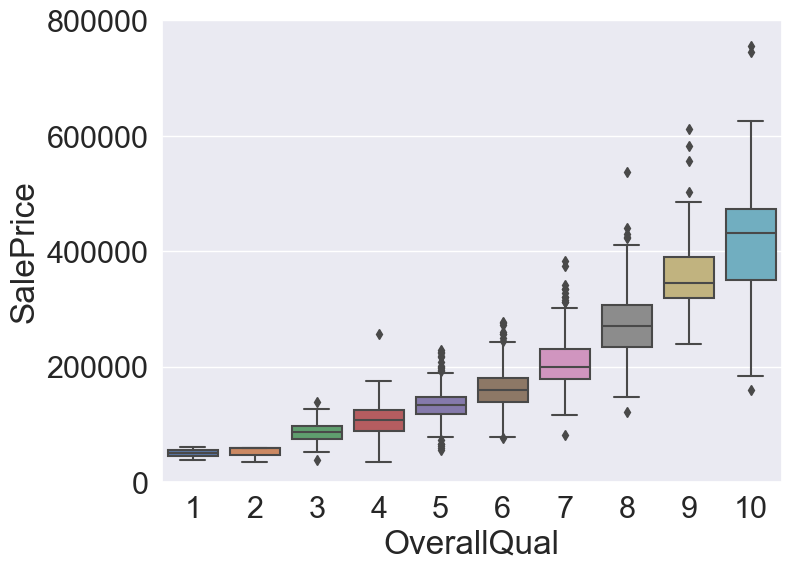

In [67]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [68]:
num_cols = [col for col in train.columns if train[col].dtype in ["float16","float32","float64", "int64", "int32"]]
cat_cols = [col for col in train.columns if train[col].dtype not in ["float16","float32","float64", "int64", "int32"]]

In [69]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
GarageType       81  0.055479
GarageCond       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
WoodDeckSF        0  0.000000
PavedDrive        0  0.000000
LowQualFinSF      0  0.000000
GrLivArea         0  0.000000
BsmtFullBath      0  0.000000
BsmtHalfBath      0  0.000000
FullBath          0  0.000000
HalfBath          0  0.000000

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   object  
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   object  
 6   Alley          107 non-null    object  
 7   LotShape       1459 non-null   object  
 8   LandContour    1459 non-null   object  
 9   Utilities      1457 non-null   object  
 10  LotConfig      1459 non-null   object  
 11  LandSlope      1459 non-null   object  
 12  Neighborhood   1459 non-null   object  
 13  Condition1     1459 non-null   object  
 14  Condition2     1459 non-null   object  
 15  BldgType       1459 non-null   object  
 16  HouseStyle     1459 non-null   object  
 17  OverallQual    1459 non-null   ca

In [75]:
train.drop(columns=['Id'],inplace=True)
train.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl      CollgCr  ...         0           0        0   
1       FR2       Gtl      Veenker  ...         0           0        0   
2    Inside       Gtl      CollgCr  ...         0           0        0   
3    Corner       Gtl      Crawfor  ...         0           0        0   
4       FR2       Gtl      NoRidge  ...         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition SalePrice LogSalePrice  
0       0      2    2008        WD         Normal    208500    12.247694  
1       0      5    2007        WD         Normal    181500    12.109011  
2       0      9    2008        WD         Normal    223500    12.317167  
3       0      2    2006        WD        Abnorml    140000    11.849398  
4       0     12    2008        WD         Normal    250000    12.429216  

[5 rows x 74 columns]

In [76]:
train.drop(columns=['Street'],inplace=True)
train.head()

MSSubClass MSZoning  LotArea LotShape LandContour Utilities LotConfig  \
0          60       RL     8450      Reg         Lvl    AllPub    Inside   
1          20       RL     9600      Reg         Lvl    AllPub       FR2   
2          60       RL    11250      IR1         Lvl    AllPub    Inside   
3          70       RL     9550      IR1         Lvl    AllPub    Corner   
4          60       RL    14260      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1  ... 3SsnPorch ScreenPorch PoolArea  \
0       Gtl      CollgCr       Norm  ...         0           0        0   
1       Gtl      Veenker      Feedr  ...         0           0        0   
2       Gtl      CollgCr       Norm  ...         0           0        0   
3       Gtl      Crawfor       Norm  ...         0           0        0   
4       Gtl      NoRidge       Norm  ...         0           0        0   

  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice LogSalePrice  
0       0       2    2008        WD        Normal    208500    12.247694  
1       0       5    2007        WD        Normal    181500    12.109011  
2       0       9    2008        WD        Normal    223500    12.317167  
3       0       2    2006        WD       Abnorml    140000    11.849398  
4       0      12    2008        WD        Normal    250000    12.429216  

[5 rows x 73 columns]

In [77]:
test.drop(columns=['Street'],inplace=True)
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0  1461          20       RH         80.0    11622   NaN      Reg         Lvl   
1  1462          20       RL         81.0    14267   NaN      IR1         Lvl   
2  1463          60       RL         74.0    13830   NaN      IR1         Lvl   
3  1464          60       RL         78.0     9978   NaN      IR1         Lvl   
4  1465         120       RL         43.0     5005   NaN      IR1         HLS   

  Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0    AllPub    Inside  ...         120        0    NaN  MnPrv         NaN   
1    AllPub    Corner  ...           0        0    NaN    NaN        Gar2   
2    AllPub    Inside  ...           0        0    NaN  MnPrv         NaN   
3    AllPub    Inside  ...           0        0    NaN    NaN         NaN   
4    AllPub    Inside  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 79 columns]

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   object  
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Alley          107 non-null    object  
 6   LotShape       1459 non-null   object  
 7   LandContour    1459 non-null   object  
 8   Utilities      1457 non-null   object  
 9   LotConfig      1459 non-null   object  
 10  LandSlope      1459 non-null   object  
 11  Neighborhood   1459 non-null   object  
 12  Condition1     1459 non-null   object  
 13  Condition2     1459 non-null   object  
 14  BldgType       1459 non-null   object  
 15  HouseStyle     1459 non-null   object  
 16  OverallQual    1459 non-null   category
 17  OverallCond    1459 non-null   in

In [81]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(100)

Missing Ratio
GarageType         5.547945
GarageYrBlt        5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtExposure       2.602740
BsmtFinType2       2.602740
BsmtQual           2.534247
BsmtCond           2.534247
BsmtFinType1       2.534247
MasVnrArea         0.547945
Electrical         0.068493

In [82]:
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data_test = pd.DataFrame({'Missing Ratio' :test_na})
missing_data_test.head(100)

Missing Ratio
PoolQC            99.794380
MiscFeature       96.504455
Alley             92.666210
Fence             80.123372
MasVnrType        61.274846
FireplaceQu       50.034270
LotFrontage       15.558602
GarageFinish       5.346127
GarageQual         5.346127
GarageCond         5.346127
GarageYrBlt        5.346127
GarageType         5.209047
BsmtCond           3.084304
BsmtExposure       3.015764
BsmtQual           3.015764
BsmtFinType1       2.878684
BsmtFinType2       2.878684
MasVnrArea         1.028101
MSZoning           0.274160
BsmtFullBath       0.137080
BsmtHalfBath       0.137080
Functional         0.137080
Utilities          0.137080
GarageCars         0.068540
TotalBsmtSF        0.068540
KitchenQual        0.068540
BsmtUnfSF          0.068540
BsmtFinSF2         0.068540
BsmtFinSF1         0.068540
Exterior2nd        0.068540

In [83]:
zeroColumns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea','GarageYrBlt', 'GarageArea', 'GarageCars']
for i in zeroColumns:
    train[i].fillna(0,inplace=True)
    test[i].fillna(0,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotArea        1460 non-null   int64   
 3   LotShape       1460 non-null   object  
 4   LandContour    1460 non-null   object  
 5   Utilities      1460 non-null   object  
 6   LotConfig      1460 non-null   object  
 7   LandSlope      1460 non-null   object  
 8   Neighborhood   1460 non-null   object  
 9   Condition1     1460 non-null   object  
 10  Condition2     1460 non-null   object  
 11  BldgType       1460 non-null   object  
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   category
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [85]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          0
BsmtFinType2       42
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [86]:
train.isnull().sum()

MSSubClass        0
MSZoning          0
LotArea           0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0


In [87]:
y=train['SalePrice']
x=train.drop(columns=['SalePrice'],axis=1)
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [88]:
x

MSSubClass MSZoning  LotArea LotShape LandContour Utilities LotConfig  \
0             60       RL     8450      Reg         Lvl    AllPub    Inside   
1             20       RL     9600      Reg         Lvl    AllPub       FR2   
2             60       RL    11250      IR1         Lvl    AllPub    Inside   
3             70       RL     9550      IR1         Lvl    AllPub    Corner   
4             60       RL    14260      IR1         Lvl    AllPub       FR2   
5             50       RL    14115      IR1         Lvl    AllPub    Inside   
6             20       RL    10084      Reg         Lvl    AllPub    Inside   
7             60       RL    10382      IR1         Lvl    AllPub    Corner   
8             50       RM     6120      Reg         Lvl    AllPub    Inside   
9            190       RL     7420      Reg         Lvl    AllPub    Corner   
10            20       RL    11200      Reg         Lvl    AllPub    Inside   
11            60       RL    11924      IR1         Lvl    AllPub    Inside   
12            20       RL    12968      IR2         Lvl    AllPub    Inside   
13            20       RL    10652      IR1         Lvl    AllPub    Inside   
14            20       RL    10920      IR1         Lvl    AllPub    Corner   
15            45       RM     6120      Reg         Lvl    AllPub    Corner   
16            20       RL    11241      IR1         Lvl    AllPub   CulDSac   
17            90       RL    10791      Reg         Lvl    AllPub    Inside   
18            20       RL    13695      Reg         Lvl    AllPub    Inside   
19            20       RL     7560      Reg         Lvl    AllPub    Inside   
20            60       RL    14215      IR1         Lvl    AllPub    Corner   
21            45       RM     7449      Reg         Bnk    AllPub    Inside   
22            20       RL     9742      Reg         Lvl    AllPub    Inside   
23           120       RM     4224      Reg         Lvl    AllPub    Inside   
24            20       RL     8246      IR1         Lvl    AllPub    Inside   
25            20       RL    14230      Reg         Lvl    AllPub    Corner   
26            20       RL     7200      Reg         Lvl    AllPub    Corner   
27            20       RL    11478      Reg         Lvl    AllPub    Inside   
28            20       RL    16321      IR1         Lvl    AllPub   CulDSac   
29            30       RM     6324      IR1         Lvl    AllPub    Inside   
30            70  C (all)     8500      Reg         Lvl    AllPub    Inside   
31            20       RL     8544      IR1         Lvl    AllPub   CulDSac   
32            20       RL    11049      Reg         Lvl    AllPub    Corner   
33            20       RL    10552      IR1         Lvl    AllPub    Inside   
34           120       RL     7313      Reg         Lvl    AllPub    Inside   
35            60       RL    13418      Reg         Lvl    AllPub    Inside   
36            20       RL    10859      Reg         Lvl    AllPub    Corner   
37            20       RL     8532      Reg         Lvl    AllPub    Inside   
38            20       RL     7922      Reg         Lvl    AllPub    Inside   
39            90       RL     6040      Reg         Lvl    AllPub    Inside   
40            20       RL     8658      Reg         Lvl    AllPub    Inside   
41            20       RL    16905      Reg         Lvl    AllPub    Inside   
42            85       RL     9180      IR1         Lvl    AllPub   CulDSac   
43            20       RL     9200      IR1         Lvl    AllPub   CulDSac   
44            20       RL     7945      Reg         Lvl    AllPub    Inside   
45           120       RL     7658      Reg         Lvl    AllPub    Inside   
46            50       RL    12822      IR1         Lvl    AllPub   CulDSac   
47            20       FV    11096      Reg         Lvl    AllPub    Inside   
48           190       RM     4456      Reg         Lvl    AllPub    Inside   
49            20       RL     7742      Reg         Lvl 

In [89]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [94]:
from sklearn.model_selection import train_test_split
Y=train['SalePrice']
X=train.drop(columns=['SalePrice'],axis=1)
X

MSSubClass  MSZoning  LotArea  LotShape  LandContour  Utilities  \
0             60         3     8450         3            3          0   
1             20         3     9600         3            3          0   
2             60         3    11250         0            3          0   
3             70         3     9550         0            3          0   
4             60         3    14260         0            3          0   
5             50         3    14115         0            3          0   
6             20         3    10084         3            3          0   
7             60         3    10382         0            3          0   
8             50         4     6120         3            3          0   
9            190         3     7420         3            3          0   
10            20         3    11200         3            3          0   
11            60         3    11924         0            3          0   
12            20         3    12968         1            3          0   
13            20         3    10652         0            3          0   
14            20         3    10920         0            3          0   
15            45         4     6120         3            3          0   
16            20         3    11241         0            3          0   
17            90         3    10791         3            3          0   
18            20         3    13695         3            3          0   
19            20         3     7560         3            3          0   
20            60         3    14215         0            3          0   
21            45         4     7449         3            0          0   
22            20         3     9742         3            3          0   
23           120         4     4224         3            3          0   
24            20         3     8246         0            3          0   
25            20         3    14230         3            3          0   
26            20         3     7200         3            3          0   
27            20         3    11478         3            3          0   
28            20         3    16321         0            3          0   
29            30         4     6324         0            3          0   
30            70         0     8500         3            3          0   
31            20         3     8544         0            3          0   
32            20         3    11049         3            3          0   
33            20         3    10552         0            3          0   
34           120         3     7313         3            3          0   
35            60         3    13418         3            3          0   
36            20         3    10859         3            3          0   
37            20         3     8532         3            3          0   
38            20         3     7922         3            3          0   
39            90         3     6040         3            3          0   
40            20         3     8658         3            3          0   
41            20         3    16905         3            3          0   
42            85         3     9180         0            3          0   
43            20         3     9200         0            3          0   
44            20         3     7945         3            3          0   
45           120         3     7658         3            3          0   
46            50         3    12822         0            3          0   
47            20         1    11096         3            3          0   
48           190         4     4456         3            3          0   
49            20         3     7742         3            3          0   
50            60         3    13869         1            3          0   
51            50         4     6240         3            3          0   
52            90         4     8472         1            0          0   
53            20         3    50271         0            2      

In [95]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [96]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [100]:
important_features = ['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
train[important_features].describe()

YearBuilt        LotArea  OverallCond    GrLivArea     1stFlrSF  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   10516.828082     5.575342  1515.463699  1162.626712   
std      30.202904    9981.264932     1.112799   525.480383   386.587738   
min    1872.000000    1300.000000     1.000000   334.000000   334.000000   
25%    1954.000000    7553.500000     5.000000  1129.500000   882.000000   
50%    1973.000000    9478.500000     5.000000  1464.000000  1087.000000   
75%    2000.000000   11601.500000     6.000000  1776.750000  1391.250000   
max    2010.000000  215245.000000     9.000000  5642.000000  4692.000000   

          2ndFlrSF  BedroomAbvGr  OpenPorchSF     PoolArea      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean    346.992466      2.866438    46.660274     2.758904  180921.195890  
std     436.528436      0.815778    66.256028    40.177307   79442.502883  
min       0.000000      0.000000     0.000000     0.000000   34900.000000  
25%       0.000000      2.000000     0.000000     0.000000  129975.000000  
50%       0.000000      3.000000    25.000000     0.000000  163000.000000  
75%     728.000000      3.000000    68.000000     0.000000  214000.000000  
max    2065.000000      8.000000   547.000000   738.000000  755000.000000

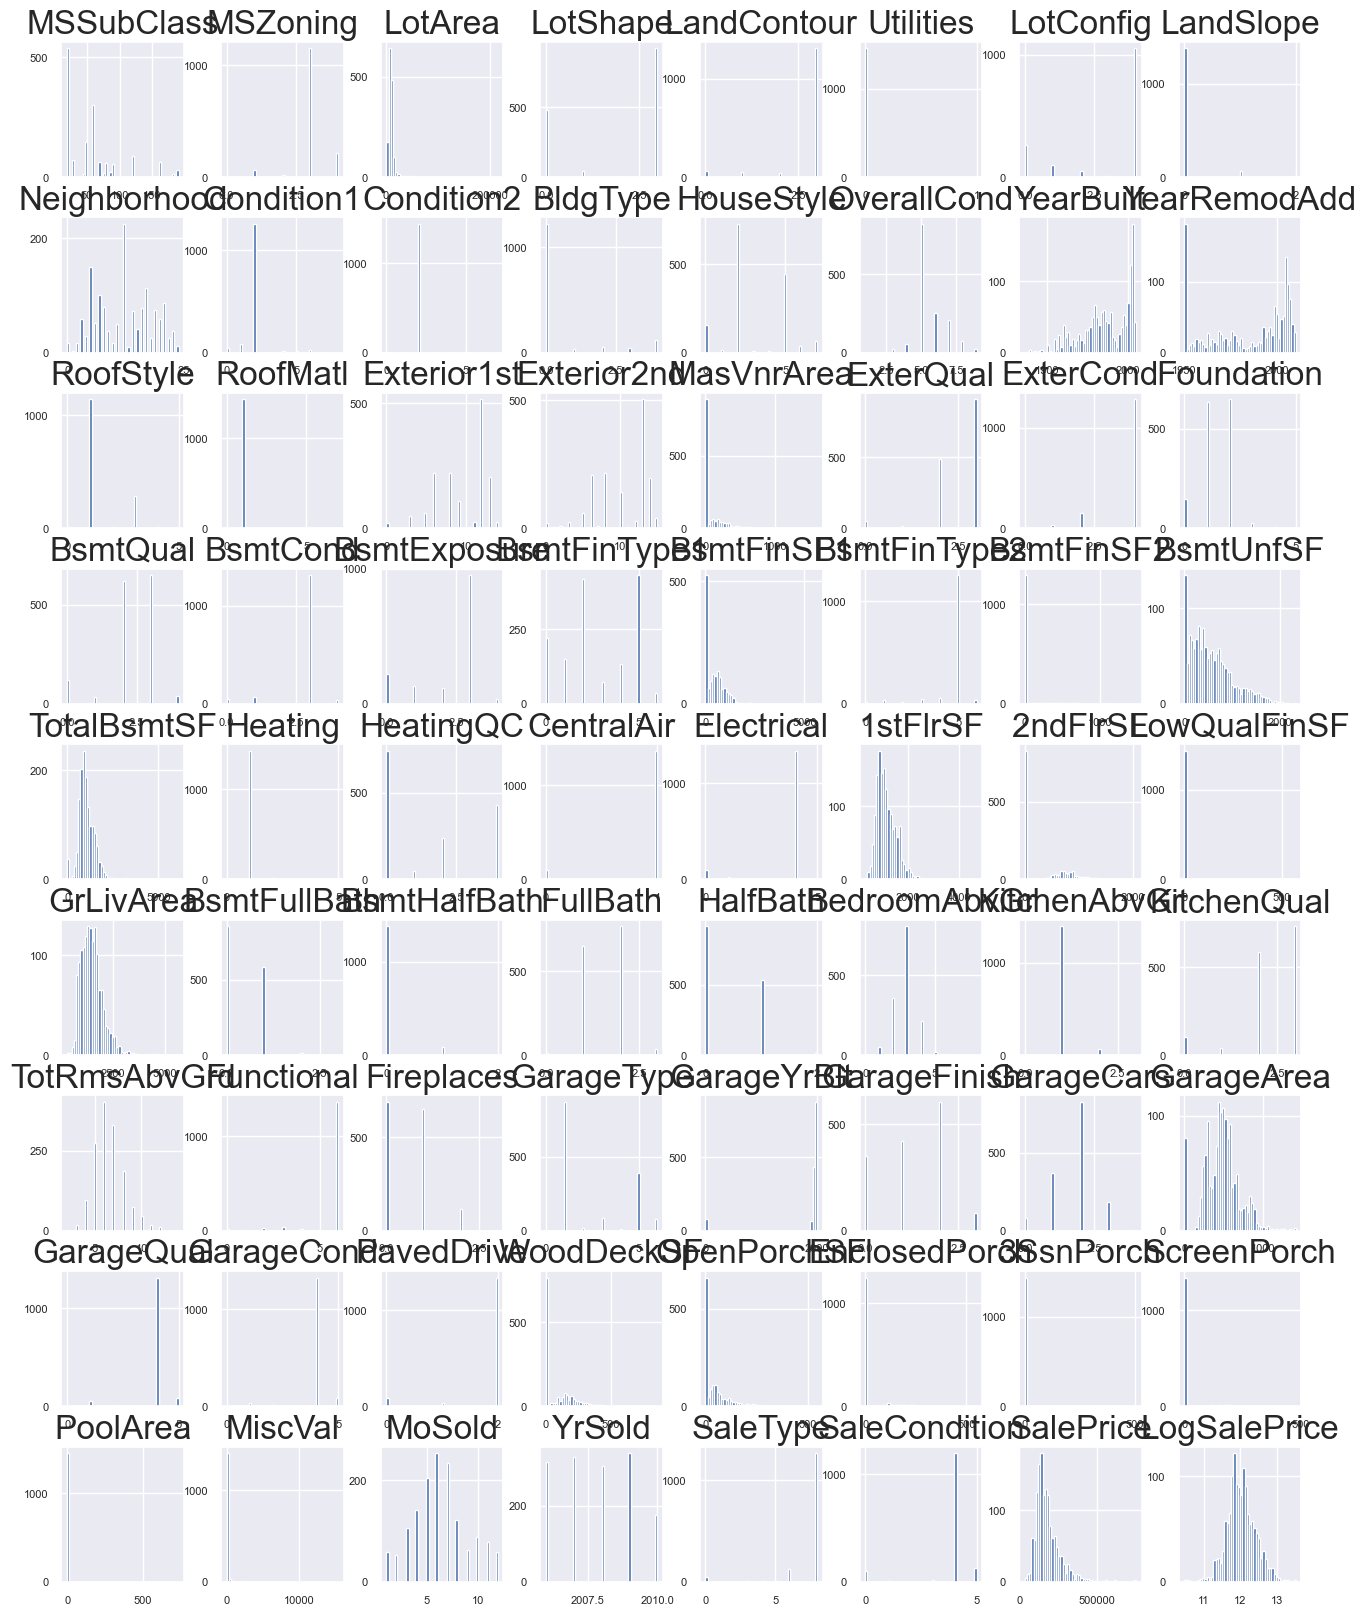

In [101]:
numerical_features = train.select_dtypes(exclude=['object'])
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

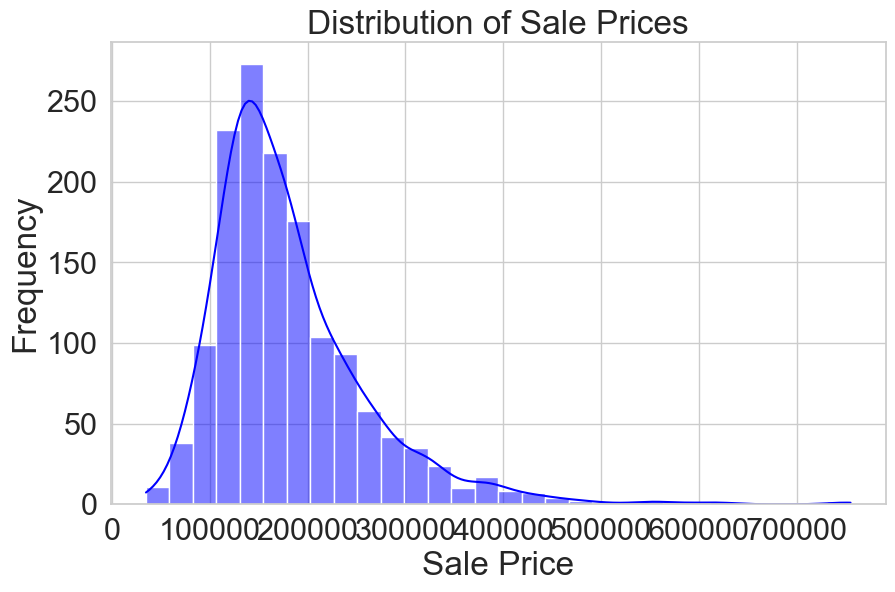

In [102]:
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

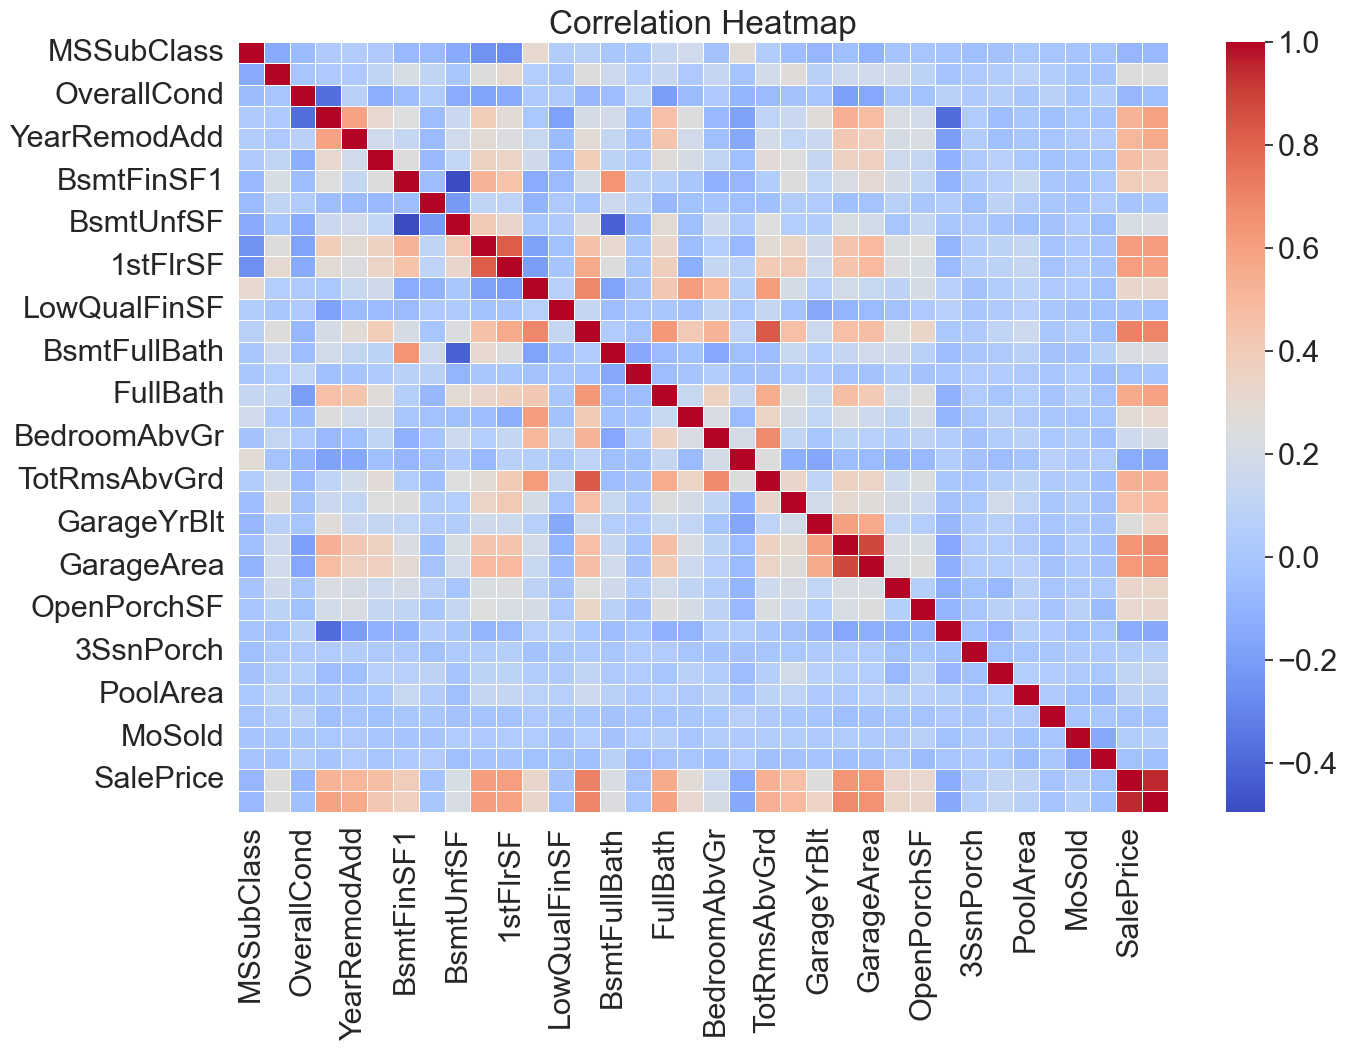

In [103]:
corr_matrix = train.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()